In [ ]:
import re
import os
import pickle
import numpy as np
import pandas as pd
import plotly.express as px

import matplotlib.pyplot as plt

In [2]:
base_path = "/ptmp/dduka/databases/ego4d/rewritten_timestamps/similarity_based/preprocess_caption_v2/sentence-transformers-all-MiniLM-L6-v2"

In [3]:
common_thresholds = [0.20, 0.25, 0.27, 0.31, 0.33, 0.35]

# Use mean pool across captions of one segment

# Using max pool across captions of one segment

# Use the ground truth as the anchor

# Use the captions as the anchor


## Aggregation mode: Mean pooling

In [5]:
files = os.listdir(base_path)
files = [f for f in files if f.endswith('mode_fixed_aggregation_mean_anchor_mode_captions_.pkl')]

results = {}
for file in files:
    with open(os.path.join(base_path, file), 'rb') as f:
        data = pickle.load(f)
    
    diff = []
    for i in range(len(data)):
        diff.append(data[i][2] - data[i][1])
    
    max_segment_length = np.max(diff)
    min_segment_length = np.min(diff)
    
    results[file] = {
        "max_segment_length": max_segment_length,
        "min_segment_length": min_segment_length,
    }

0.29
0.31
0.33
0.31
0.27
0.35
0.33
0.27
0.33
0.31
0.31
0.27
0.29
0.33
0.29
0.33
0.31
0.31
0.29
0.35
0.27
0.33
0.35
0.33
0.33
0.27
0.27
0.31
0.35
0.29
0.31
0.31
0.29
0.27
0.33
0.33
0.29
0.35
0.35
0.27
0.29
0.35
0.27
0.29
0.35
0.31
0.35
0.29
0.27
0.35


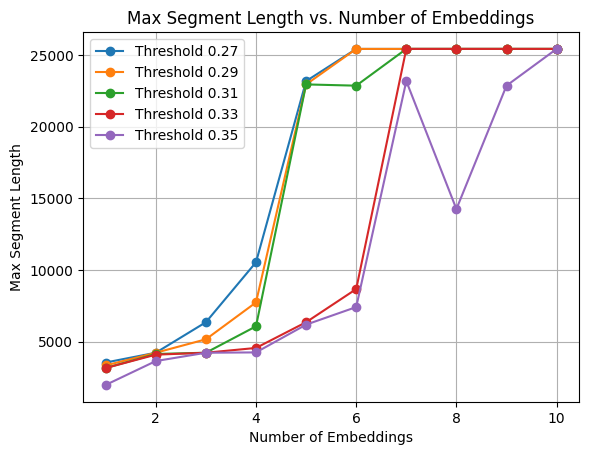

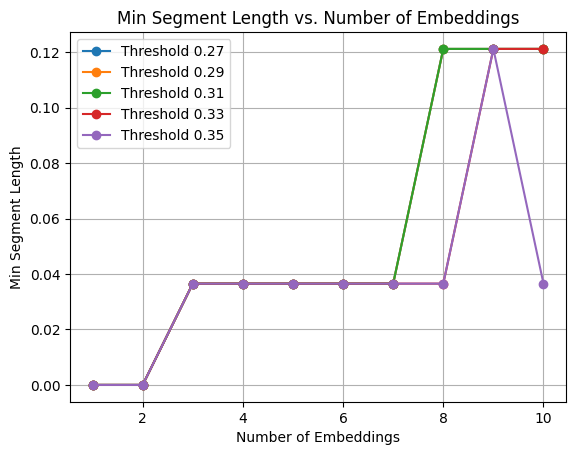

In [6]:
# 2. Parse the data into a list of dictionaries
parsed_data = []
for filename, values in results.items():
    threshold_match = re.search(r'threshold_(\d\.\d+)', filename)
    threshold = threshold_match.group(1) if threshold_match else None
    
    embeddings_match = re.search(r'embeddings_(\d+)', filename)
    embeddings = embeddings_match.group(1) if embeddings_match else None

    if threshold and embeddings:
        parsed_data.append({
            'threshold': threshold,
            'embeddings': int(embeddings),
            'max_segment_length': values['max_segment_length'],
            'min_segment_length': values['min_segment_length']
        })

# 3. Create a pandas DataFrame
df = pd.DataFrame(parsed_data)

# 4. Create Plot 1: Max Segment Length
fig, ax = plt.subplots()

# Get unique thresholds to plot one line per threshold
thresholds = df['threshold'].unique()
thresholds.sort() # Sort for a consistent legend order

for threshold in thresholds:
    # Filter data for the current threshold
    subset = df[df['threshold'] == threshold]
    # Sort by embeddings to connect the line plot correctly
    subset = subset.sort_values('embeddings')
    
    ax.plot(subset['embeddings'], subset['max_segment_length'], 
            marker='o', label=f'Threshold {threshold}')

# Set labels and title
ax.set_xlabel('Number of Embeddings')
ax.set_ylabel('Max Segment Length')
ax.set_title('Max Segment Length vs. Number of Embeddings')
ax.legend()
ax.grid(True)
plt.show()

# 5. Create Plot 2: Min Segment Length
fig, ax = plt.subplots()

for threshold in thresholds:
    # Filter and sort
    subset = df[df['threshold'] == threshold].sort_values('embeddings')
    
    ax.plot(subset['embeddings'], subset['min_segment_length'], 
            marker='o', label=f'Threshold {threshold}')

# Set labels and title
ax.set_xlabel('Number of Embeddings')
ax.set_ylabel('Min Segment Length')
ax.set_title('Min Segment Length vs. Number of Embeddings')
ax.legend()
ax.grid(True)
plt.show()

## Aggregation mode: Max pooling

In [ ]:
files = os.listdir(base_path)
files = [f for f in files if f.endswith('mode_fixed_aggregation_max_pooling_anchor_mode_captions_.pkl')]

results = {}
for file in files:
    with open(os.path.join(base_path, file), 'rb') as f:
        data = pickle.load(f)
    
    diff = []
    for i in range(len(data)):
        diff.append(data[i][2] - data[i][1])
    
    max_segment_length = np.max(diff)
    min_segment_length = np.min(diff)
    
    results[file] = {
        "max_segment_length": max_segment_length,
        "min_segment_length": min_segment_length,
    }

0.35
0.33
0.33
0.31
0.33
0.35
0.35
0.33
0.33
0.35
0.35
0.35
0.31
0.31


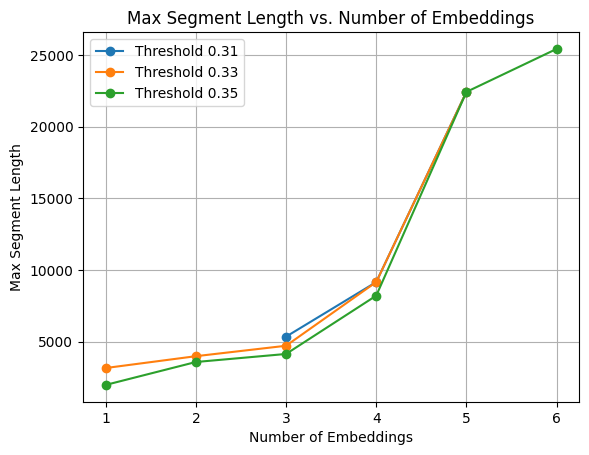

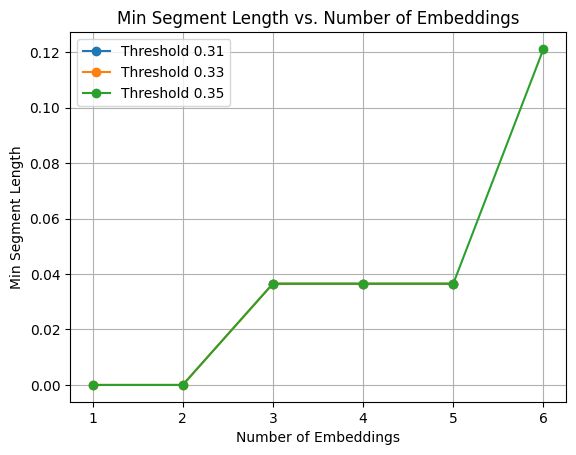

In [ ]:
# 2. Parse the data into a list of dictionaries
parsed_data = []
for filename, values in results.items():
    threshold_match = re.search(r'threshold_(\d\.\d+)', filename)
    threshold = threshold_match.group(1) if threshold_match else None
    print(threshold)

    embeddings_match = re.search(r'embeddings_(\d+)', filename)
    embeddings = embeddings_match.group(1) if embeddings_match else None

    if threshold and embeddings:
        parsed_data.append({
            'threshold': threshold,
            'embeddings': int(embeddings),
            'max_segment_length': values['max_segment_length'],
            'min_segment_length': values['min_segment_length']
        })

# 3. Create a pandas DataFrame
df = pd.DataFrame(parsed_data)

# 4. Create Plot 1: Max Segment Length
fig, ax = plt.subplots()

# Get unique thresholds to plot one line per threshold
thresholds = df['threshold'].unique()
thresholds.sort() # Sort for a consistent legend order

for threshold in thresholds:
    # Filter data for the current threshold
    subset = df[df['threshold'] == threshold]
    # Sort by embeddings to connect the line plot correctly
    subset = subset.sort_values('embeddings')
    
    ax.plot(subset['embeddings'], subset['max_segment_length'], 
            marker='o', label=f'Threshold {threshold}')

# Set labels and title
ax.set_xlabel('Number of Embeddings')
ax.set_ylabel('Max Segment Length')
ax.set_title('Max Segment Length vs. Number of Embeddings')
ax.legend()
ax.grid(True)
plt.show()

# 5. Create Plot 2: Min Segment Length
fig, ax = plt.subplots()

for threshold in thresholds:
    # Filter and sort
    subset = df[df['threshold'] == threshold].sort_values('embeddings')
    
    ax.plot(subset['embeddings'], subset['min_segment_length'], 
            marker='o', label=f'Threshold {threshold}')

# Set labels and title
ax.set_xlabel('Number of Embeddings')
ax.set_ylabel('Min Segment Length')
ax.set_title('Min Segment Length vs. Number of Embeddings')
ax.legend()
ax.grid(True)
plt.show()

In [ ]:
files = os.listdir(base_path)
files = [f for f in files if f.endswith('two_caption.pkl')]

print(len(files))

results = {}
for file in files:
    with open(os.path.join(base_path, file), 'rb') as f:
        data = pickle.load(f)
    
    diff = []
    for i in range(len(data)):
        diff.append(data[i][2] - data[i][1])
    
    max_segment_length = np.max(diff)
    min_segment_length = np.min(diff)
    
    results[file] = {
        "max_segment_length": max_segment_length,
        "min_segment_length": min_segment_length,
    }

0


In [ ]:
rows = []
for k, v in results.items():
    th = re.search(r"threshold_([0-9.]+)", k)
    emb = re.search(r"embeddings_([0-9]+)", k)
    if not th or not emb:
        continue
    rows.append({
        "embedding": int(emb.group(1)),
        "threshold": float(th.group(1)),
        "min_segment_length": float(v.get("min_segment_length", float("nan"))),
        "max_segment_length": float(v.get("max_segment_length", float("nan"))),
        "run_key": k
    })

df = pd.DataFrame(rows)

# average duplicates of the same (embedding, threshold) if any
agg = (
    df.groupby(["embedding", "threshold"], as_index=False)
      .agg(min_segment_length=("min_segment_length", "mean"),
           max_segment_length=("max_segment_length", "mean"))
      .sort_values(["embedding", "threshold"])
)

# make a nicer legend label like "embeddings 7"
agg["embedding_label"] = agg["embedding"].map(lambda x: f"embeddings {x}")

# --- interactive figure 1: MIN vs threshold ---
fig_min = px.line(
    agg, x="threshold", y="min_segment_length",
    color="embedding_label", markers=True,
    title="Min segment length vs threshold (grouped by embeddings)"
)
fig_min.update_traces(hovertemplate=(
    "embedding=%{legendgroup}<br>threshold=%{x}<br>min=%{y}<extra></extra>"
))
fig_min.update_layout(xaxis_title="threshold", yaxis_title="min_segment_length")

# --- interactive figure 2: MAX vs threshold ---
fig_max = px.line(
    agg, x="threshold", y="max_segment_length",
    color="embedding_label", markers=True,
    title="Max segment length vs threshold (grouped by embeddings)"
)
fig_max.update_traces(hovertemplate=(
    "embedding=%{legendgroup}<br>threshold=%{x}<br>max=%{y}<extra></extra>"
))
fig_max.update_layout(xaxis_title="threshold", yaxis_title="max_segment_length")

# show in notebooks; or save as standalone HTML
fig_min.show()
fig_max.show()

KeyError: 'embedding'

# One caption vs different threasholds approch

In [7]:
files = os.listdir(base_path)
files = [f for f in files if f.endswith('one_caption.pkl')]

results = {}
for file in files:
    with open(os.path.join(base_path, file), 'rb') as f:
        data = pickle.load(f)
    
    diff = []
    for i in range(len(data)):
        diff.append(data[i][2] - data[i][1])
    
    max_segment_length = np.max(diff)
    min_segment_length = np.min(diff)
    
    results[file] = {
        "max_segment_length": max_segment_length,
        "min_segment_length": min_segment_length,
    }

Displaying Max Segment Length plot...


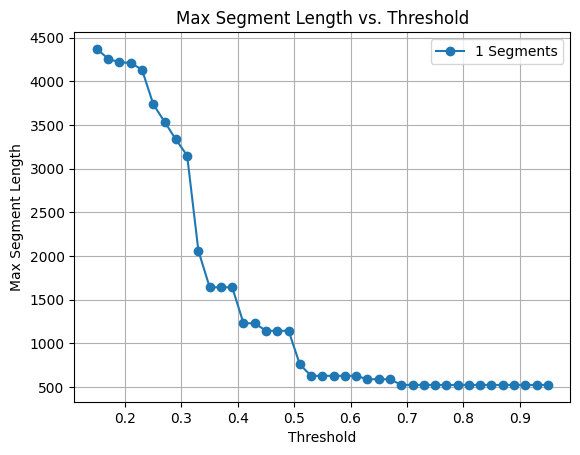

Displaying Min Segment Length plot...


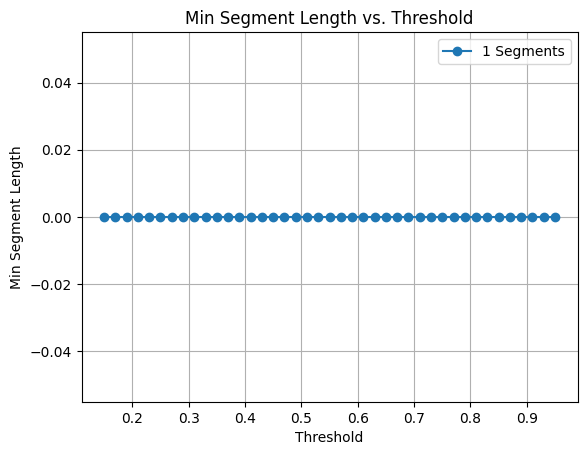

In [13]:
# 2. Parse the data
parsed_data = []
for filename, values in results.items():
    threshold_match = re.search(r'threshold_(\d\.\d+)', filename)
    threshold = threshold_match.group(1) if threshold_match else None

    embeddings_match = re.search(r'embeddings_(\d+)', filename)
    segments = embeddings_match.group(1) if embeddings_match else None

    if threshold and segments:
        parsed_data.append({
            'threshold': float(threshold), # Convert to float for sorting
            'number_of_segments': int(segments),
            'max_segment_length': values['max_segment_length'],
            'min_segment_length': values['min_segment_length']
        })

# 3. Create a pandas DataFrame
df = pd.DataFrame(parsed_data)

# --- Plot 1: Max Segment Length vs. Threshold ---
fig1, ax1 = plt.subplots()

# Get unique segment counts to plot one line per count
segment_counts = df['number_of_segments'].unique()
segment_counts.sort() # Sort for a consistent legend order

for count in segment_counts:
    # Filter data for the current segment count
    subset = df[df['number_of_segments'] == count]
    # Sort by threshold to connect the line plot correctly
    subset = subset.sort_values('threshold')
    
    ax1.plot(subset['threshold'], subset['max_segment_length'], 
             marker='o', label=f'{count} Segments')

# Set labels and title
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Max Segment Length')
ax1.set_title('Max Segment Length vs. Threshold')
ax1.legend()
ax1.grid(True)
print("Displaying Max Segment Length plot...")
plt.show() # This will display the first plot


# --- Plot 2: Min Segment Length vs. Threshold ---
fig2, ax2 = plt.subplots()

for count in segment_counts:
    # Filter and sort
    subset = df[df['number_of_segments'] == count].sort_values('threshold')
    
    ax2.plot(subset['threshold'], subset['min_segment_length'], 
             marker='o', label=f'{count} Segments')

# Set labels and title
ax2.set_xlabel('Threshold')
ax2.set_ylabel('Min Segment Length')
ax2.set_title('Min Segment Length vs. Threshold')
ax2.legend()
ax2.grid(True)
print("Displaying Min Segment Length plot...")
plt.show() # This will display the second plot

# Two captions vs different threasholds approch

In [14]:
files = os.listdir(base_path)
files = [f for f in files if f.endswith('two_captions.pkl')]

results = {}
for file in files:
    with open(os.path.join(base_path, file), 'rb') as f:
        data = pickle.load(f)
    
    diff = []
    for i in range(len(data)):
        diff.append(data[i][2] - data[i][1])
    
    max_segment_length = np.max(diff)
    min_segment_length = np.min(diff)
    
    results[file] = {
        "max_segment_length": max_segment_length,
        "min_segment_length": min_segment_length,
    }

Displaying Max Segment Length plot...


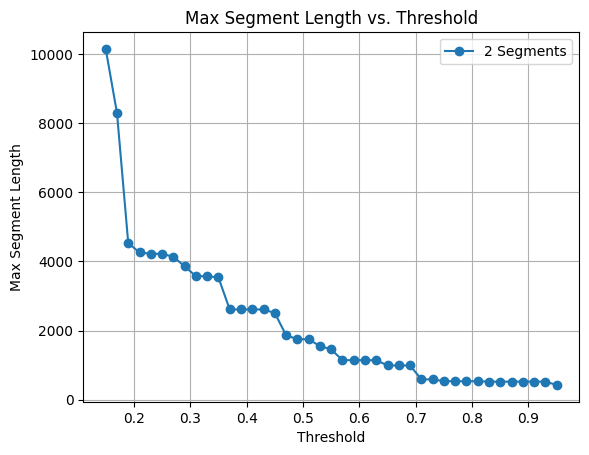

Displaying Min Segment Length plot...


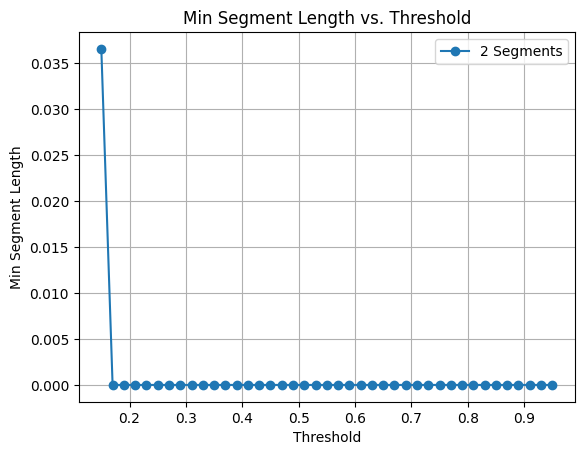

In [15]:
# 2. Parse the data
parsed_data = []
for filename, values in results.items():
    threshold_match = re.search(r'threshold_(\d\.\d+)', filename)
    threshold = threshold_match.group(1) if threshold_match else None

    embeddings_match = re.search(r'embeddings_(\d+)', filename)
    segments = embeddings_match.group(1) if embeddings_match else None

    if threshold and segments:
        parsed_data.append({
            'threshold': float(threshold), # Convert to float for sorting
            'number_of_segments': int(segments),
            'max_segment_length': values['max_segment_length'],
            'min_segment_length': values['min_segment_length']
        })

# 3. Create a pandas DataFrame
df = pd.DataFrame(parsed_data)

# --- Plot 1: Max Segment Length vs. Threshold ---
fig1, ax1 = plt.subplots()

# Get unique segment counts to plot one line per count
segment_counts = df['number_of_segments'].unique()
segment_counts.sort() # Sort for a consistent legend order

for count in segment_counts:
    # Filter data for the current segment count
    subset = df[df['number_of_segments'] == count]
    # Sort by threshold to connect the line plot correctly
    subset = subset.sort_values('threshold')
    
    ax1.plot(subset['threshold'], subset['max_segment_length'], 
             marker='o', label=f'{count} Segments')

# Set labels and title
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Max Segment Length')
ax1.set_title('Max Segment Length vs. Threshold')
ax1.legend()
ax1.grid(True)
print("Displaying Max Segment Length plot...")
plt.show() # This will display the first plot


# --- Plot 2: Min Segment Length vs. Threshold ---
fig2, ax2 = plt.subplots()

for count in segment_counts:
    # Filter and sort
    subset = df[df['number_of_segments'] == count].sort_values('threshold')
    
    ax2.plot(subset['threshold'], subset['min_segment_length'], 
             marker='o', label=f'{count} Segments')

# Set labels and title
ax2.set_xlabel('Threshold')
ax2.set_ylabel('Min Segment Length')
ax2.set_title('Min Segment Length vs. Threshold')
ax2.legend()
ax2.grid(True)
print("Displaying Min Segment Length plot...")
plt.show() # This will display the second plot